In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Utility Functions (Page 1)**

In [ ]:
def Labels_Hydrogen(N):
  labels = []
  for i in range(0, N):
    labels.append((i, i))
  return labels

In [ ]:
def Labels_Distort(N):
  labels = []
  for i in range(0, N):
    labels.append((i, 'a'))
    labels.append((i, 'b'))
  return labels

In [ ]:
def Labels_Graphene(N1, N2):
  labels = []
  for n in range(N2):
    for m in range(N1):
      labels.append(((m, n), 'a'))
      labels.append(((m, n), 'b'))
  return labels

In [ ]:
def LabelToRGraphene(label):
  a1 = (1, 0)
  a2 = (1/2, np.sqrt(3)/2)
  tau1 = (0, 1/np.sqrt(3))
  cell, atom = label
  x = cell[0]
  y = cell[1]
  x_dist = (x)*a1[0] + (y)*a2[0]
  y_dist = (x)*a1[1] + (y)*a2[1]
  if(atom == 'b'):
    y_dist += tau1[1]
  return (x_dist, y_dist)

In [ ]:
def momentumLabelToK_Graphene(label, N1, N2):
  cell, atom = label
  x = cell[0]
  y = cell[1]
  b1 = ((2*np.pi)/N1, (-1/np.sqrt(3))*(2*np.pi)/N1)
  b2 = (0, (-2/np.sqrt(3))*(2*np.pi)/N2)
  x_dist = (x)*b1[0] + (y)*b2[0]
  y_dist = (x)*b1[1] + (y)*b2[1]
  return (x_dist, y_dist)

In [ ]:
def LabelToR(myLabel):
  cell, atom = myLabel
  if(cell == atom):
    return atom-1
  else:
    dist = (cell)*2
    if(atom == 'a'):
      return dist
    else:
      return dist + 0.8

In [ ]:
def LabelToIndexGraphene(myLabel, N1, N2):
  cell,atom = myLabel
  x, y = cell
  #if we go right:
  idx = (x*2) #idx of a
  idx = idx + (N1*2)*y
  if(atom=='b'):
    idx += 1
  return idx

In [ ]:
def LabelToIndex(label):
  cell, atom = label
  if(cell == atom):
    return cell
  else:
    position = (cell*2) + 1 #index of atom b in that cell
    if(atom == 'b'):
      return position
    else:
      return position-1

In [ ]:
def momentumLabels_Hydrogen(N):
  return Labels_Hydrogen(N)

In [ ]:
def momentumLabels_Distort(N):
  return Labels_Distort(N)

In [ ]:
def momentumLabelToK(label, N):
  cell, atom = label
  b1 = (2*np.pi)/float(N)
  return (cell-1)*b1

In [ ]:
def momentumLabelToK_Distort(label, N):
  cell, atom = label
  b1 = (2*np.pi)/float(2*N)
  return (cell-1)*b1

In [ ]:
def momentumLabels_Graphene(N1, N2):
  return Labels_Graphene(N1, N2)

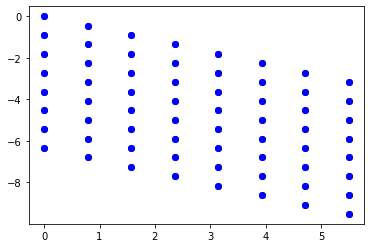

In [ ]:
N1 = 8
N2 = 8
myLabels = momentumLabels_Graphene(N1, N2)
points = []
count = 0
for label in myLabels:
  x, y = momentumLabelToK_Graphene(label, N1, N2)
  plt.plot(x, y, marker='o', color='b')

(0, 0) -1.0471975511965976
(1, 1) 0.0
(2, 2) 1.0471975511965976
(3, 3) 2.0943951023931953
(4, 4) 3.141592653589793
(5, 5) 4.1887902047863905


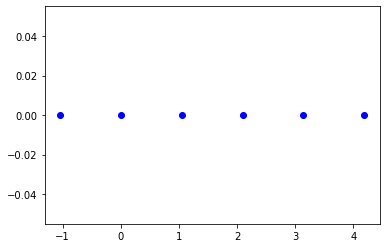

In [ ]:
N = 6
myLabels = momentumLabels_Hydrogen(N)
points = []
for label in myLabels:
  print(label, momentumLabelToK(label, N))
  plt.plot(momentumLabelToK(label, N),0, marker='o', color='b')

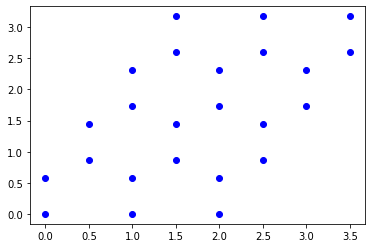

In [ ]:
N1 = 3
N2 = 4
myLabels = Labels_Graphene(N1, N2)
points = []
for label in myLabels:
  #print(label, LabelToIndexGraphene(label, N1, N2))
  plt.plot(LabelToRGraphene(label)[0], LabelToRGraphene(label)[1], marker='o', color='b')

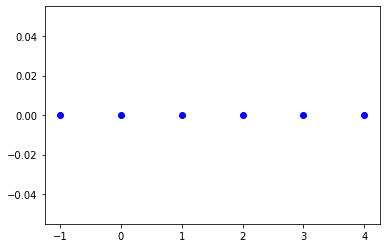

In [ ]:
myLabels = Labels_Hydrogen(6)
for label in myLabels:
  plt.plot(LabelToR(label), 0, marker='o', color='b')

[(0, 'a'), (0, 'b'), (1, 'a'), (1, 'b'), (2, 'a'), (2, 'b')]


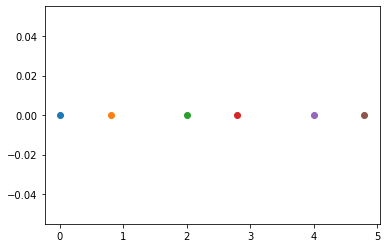

In [ ]:
myLabels = Labels_Distort(3)
print(myLabels)
for label in myLabels:
  plt.plot(LabelToR(label), 0, marker='o')

# **Tight Binding Models**

## Hydrogen Chain

In [ ]:
def H(N):
  labels = Labels_Hydrogen(N)
  H = np.zeros((N, N))
  for i in range(N):
    for j in range(N):
      #if(abs(i-j)%2 != 0):
      if(abs(labels[i][0] - labels[j][0])==1):
        H[i][j] = -1
      if(abs(labels[i][0] - labels[j][0]) == N-1):
        H[i][j] = -1
  return H

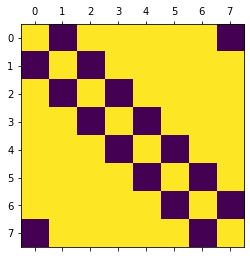

In [ ]:
plt.matshow(H(8))

In [ ]:
def F(N):
  F = np.zeros((N, N), complex)
  labels = Labels_Hydrogen(N)
  mom_labels = momentumLabels_Hydrogen(N)
  for i in range(N):
    for j in range(N):
      k = momentumLabelToK(mom_labels[j], N)
      r = LabelToR(labels[i])
      F[i,j] = np.exp(1j*k*r)/np.sqrt(N)
  return F

[-1.41421356e+00-4.71777649e-18j -2.00000000e+00+0.00000000e+00j
 -1.41421356e+00+4.71777649e-18j  8.22571099e-35+3.27054144e-49j
  1.41421356e+00-6.02390960e-18j  2.00000000e+00+5.92018547e-33j
  1.41421356e+00-2.41666225e-17j  2.07155816e-32+2.18952885e-47j]


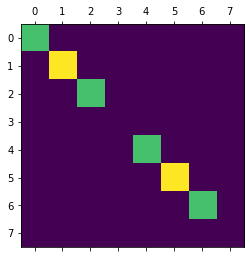

In [ ]:
Hk = F(8).conj().T@H(8)@F(8)
plt.matshow(np.abs(Hk))
print(np.diag(Hk))

In [ ]:
identity = F(8)@F(8).conj().T
for i in range(identity.shape[0]):
  for j in range(identity.shape[1]):
    if(identity[i][j] < 0.0000001):
      identity[i][j] = 0
print(np.abs(identity))

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Energy')

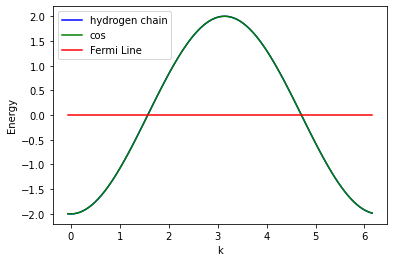

In [ ]:
import math
N = 100
Hk = F(N).conj().T@H(N)@F(N)
Es = np.diag(Hk)
labels = momentumLabels_Hydrogen(N)
ks = []
for i in range(len(Es)):
  ks.append(momentumLabelToK(labels[i], N))
s = sorted(Es)
middle = (s[math.floor(len(Es)/2)] + s[math.ceil(len(Es)/2)])/2.0
plt.plot(ks, Es, color='b', label='hydrogen chain')
plt.plot(ks, -2*np.cos(ks), color='g', label='cos')
plt.plot(ks, np.ones(len(ks))*middle, label='Fermi Line', color='r')
plt.legend()
plt.xlabel('k')
plt.ylabel('Energy')

## Distorted Hydrogen Chain

In [ ]:
def distort_neighbors(label, N):
  neighbors = []
  if(label[1] == 'a'):
    neighbors.append((label[0], 'b'))
    if(label[0]-1 >= 0):
      neighbors.append((label[0]-1, 'b'))
    else:
      neighbors.append((N-1, 'b'))
  if(label[1] == 'b'):
    neighbors.append((label[0], 'a'))
    if(label[0]+1 < N):
      neighbors.append((label[0]+1, 'a'))
    else:
      neighbors.append((0, 'a'))
  return neighbors

In [ ]:
def H_Distort(N):
  labels = Labels_Distort(N)
  N2 = len(labels)
  H = np.zeros((N2, N2))
  for i in range(N2):
    row = LabelToIndex(labels[i])
    neighbors = distort_neighbors(labels[i], N)
    for j in range(len(neighbors)):
      col = LabelToIndex(neighbors[j])
      if(j==0):
        H[row][col] = -1
      else:
        H[row][col] = -0.1
  return H

[[ 0.  -1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.1]
 [-1.   0.  -0.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.1  0.  -1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   0.  -0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.1  0.  -1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   0.  -0.1  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -1.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   0.  -0.1  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.1  0.  -1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.   0.  -0.1  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.1  0.  -1. ]
 [-0.1  0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.   0. ]]


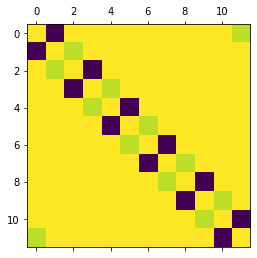

In [ ]:
print(H_Distort(6))
plt.matshow(H_Distort(6))

In [ ]:
def F_Distort(N):
  F = np.zeros((2*N, 2*N), complex)
  labels = Labels_Distort(N)
  mom_labels = momentumLabels_Distort(N)
  for i in range(2*N):
    for j in range(2*N):
      k = momentumLabelToK_Distort(mom_labels[j], N)
      r = LabelToR(labels[i])
      d1 = mom_labels[j][1]
      d2 = labels[i][1]
      if(d1==d2): delta = 1
      else: delta = 0
      F[i,j] = (1/np.sqrt(N))*delta*np.exp(1j*k*r)
  return F

In [ ]:
identity = F_Distort(3)@F_Distort(3).conj().T
for i in range(identity.shape[0]):
  for j in range(identity.shape[1]):
    if(identity[i][j] < 0.0000001):
      identity[i][j] = 0
print(np.abs(identity))

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


[-1.1       -0.9539392 -0.9539392  0.9539392  0.9539392  1.1      ]


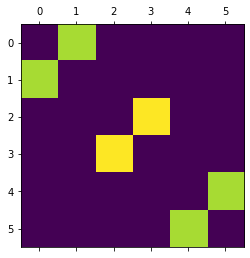

In [ ]:
Hk = F_Distort(3).conj().T@H_Distort(3)@F_Distort(3)
plt.matshow(np.abs(Hk))
print(np.linalg.eigh(Hk)[0])

In [ ]:
N = 100
Hk = F_Distort(N).conj().T@H_Distort(N)@F_Distort(N)
mom_labels = momentumLabels_Distort(N)
E1 = []
E2 = []
ks = []
for i in range(0,len(Hk),2):
  block = Hk[i:i+2,i:i+2]
  energies = np.linalg.eigh(block)[0]
  E1.append(energies[0])
  E2.append(energies[1])
  ks.append(momentumLabelToK_Distort(mom_labels[i], N))

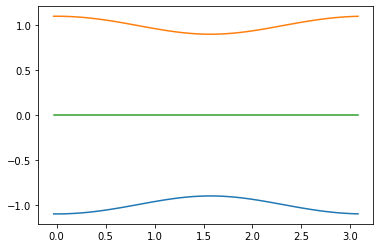

In [ ]:
plt.plot(ks,E1)
plt.plot(ks,E2)
plt.plot(ks, np.zeros(len(ks)))

Text(0, 0.5, 'Energy')

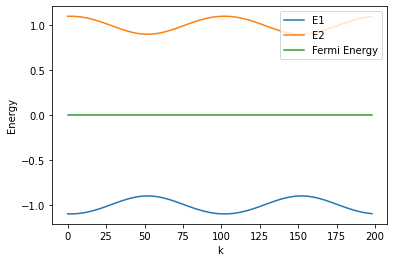

In [ ]:
s = sorted(E1 + E2)
middle = (s[math.floor(len(s)/2)-1] + s[math.ceil(len(s)/2)])/2.0
plt.plot(ks, E1, label = 'E1')
plt.plot(ks, E2, label = 'E2')
plt.plot(ks, np.ones(len(ks))*middle, label = 'Fermi Energy')
plt.legend()
plt.xlabel('k')
plt.ylabel('Energy')

## Graphene

In [ ]:
def neighbors_grapheneSimple(label, N1, N2):
  neighbors = []
  x, y = label[0]
  atom = label[1]
  if(atom == 'a'):
    s = 0
    neighbors.append(((x%N1, y%N2), 'b'))
    neighbors.append((((x-(2*s-1))%N1, y%N2), 'b'))
    neighbors.append(((x%N1, (y+(2*s-1))%N2), 'b'))
  else:
    s = 1
    neighbors.append(((x%N1, y%N2), 'a'))
    neighbors.append((((x-(2*s-1))%N1, y%N2), 'a'))
    neighbors.append(((x%N1, (y+(2*s-1))%N2), 'a'))
  return neighbors
#the x part should be in second neighbor and y part should also be in first neighbor

  #[x, y]
  #[x-(2s-1), y]
  #[x, y+(2s-1)]
  #s = 0 for a, s =1 for b
  #%N1 on x-coords, %N2 on y-coords

In [ ]:
def neighbors_graphene(label, N1, N2):
  neighbors = []
  x, y = label[0]
  atom = label[1]
  if(atom == 'a'):
    neighbors.append(((label[0], 'b')))
    if(y-1 >= 0):
      neighbors.append(((x, y-1), 'b'))
      if(x+1 < N1):
        neighbors.append(((x+1, y-1), 'b'))
      else:
        neighbors.append(((0, y-1), 'b'))
    else:
      neighbors.append(((x, N2-1), 'b'))
      if(x+1 < N1):
        neighbors.append(((x+1, N2-1), 'b'))
      else:
        neighbors.append(((0, N2-1), 'b'))

  else:
    neighbors.append((label[0], 'a'))
    if(y+1 < N2):
        neighbors.append(((x, y+1), 'a'))
        if(x-1 >= 0):
          neighbors.append(((x-1, y+1), 'a'))
        else:
          neighbors.append(((N1-1, y+1), 'a'))
    else:
      neighbors.append(((x, 0), 'a'))
      if(x-1 >= 0):
        neighbors.append(((x-1, 0), 'a'))
      else:
        neighbors.append(((N1-1, 0), 'a'))
  return neighbors

In [ ]:
def neighbors_notwrap(label, N1, N2):
  neighbors = []
  x, y = label[0]
  atom = label[1]
  if(atom == 'a'):
    neighbors.append(((label[0], 'b')))
    if(y-1 >= 0):
      neighbors.append(((x, y-1), 'b'))
      if(x+1 < N1):
        neighbors.append(((x+1, y-1), 'b'))
  else:
    neighbors.append((label[0], 'a'))
    if(y+1 < N2):
        neighbors.append(((x, y+1), 'a'))
        if(x-1 >= 0):
          neighbors.append(((x-1, y+1), 'a'))
  return neighbors

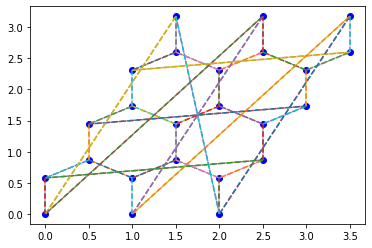

In [ ]:
N1 = 3
N2 = 4
myLabels = Labels_Graphene(N1, N2)
points = []
for label in myLabels:
  r = LabelToRGraphene(label)
  plt.plot(r[0], r[1], marker='o', color='b')
  ns = neighbors_graphene(label, N1, N2)
  for n in ns:
    r2 = LabelToRGraphene(n)
    plt.plot([r[0], r2[0]], [r[1], r2[1]], linestyle='--')

In [ ]:
def H_Graphene(N1, N2):
  labels = Labels_Graphene(N1, N2)
  N = len(labels)
  H = np.zeros((N, N))
  for i in range(N):
    row = LabelToIndexGraphene(labels[i], N1, N2)
    neighbors = neighbors_graphene(labels[i], N1, N2)
    for j in range(len(neighbors)):
      col = LabelToIndexGraphene(neighbors[j], N1, N2)
      H[row][col] = -1
  return H

In [ ]:
print(H_Graphene(3, 3).shape)

(18, 18)


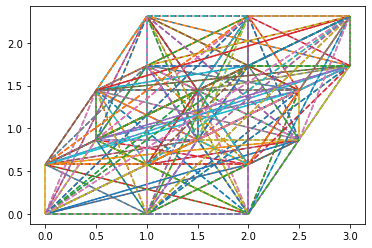

In [ ]:
H = H_Graphene(3, 3)
labels = Labels_Graphene(3, 3)
for i in range(H.shape[0]):
  for j in range(H.shape[1]):
    first = LabelToRGraphene(labels[i])
    sec = LabelToRGraphene(labels[j])
    plt.plot([first[0], sec[0]], [first[1], sec[1]], linestyle='--')

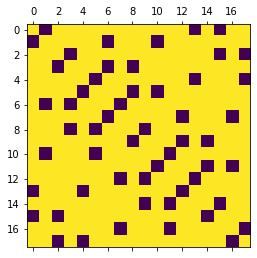

In [ ]:
plt.matshow(H_Graphene(3, 3))

In [ ]:
def F_Graphene(N1, N2):
  labels = Labels_Graphene(N1, N2)
  mom_labels = momentumLabels_Graphene(N1, N2)
  N = len(labels)
  F = np.zeros((N, N), complex)
  for i in range(N):
    for j in range(N):
      k = momentumLabelToK_Graphene(mom_labels[j], N1, N2)
      r = LabelToRGraphene(labels[i])
      d1 = mom_labels[j][1]
      d2 = labels[i][1]
      if(d1==d2): delta = 1
      else: delta = 0
      F[i,j] = (np.sqrt(2)/np.sqrt(N))*delta*np.exp(1j*np.dot(k,r))
  return F

In [ ]:
identity = F_Graphene(3, 3)@F_Graphene(3, 3).conj().T
for i in range(identity.shape[0]):
  for j in range(identity.shape[1]):
    if(identity[i][j] < 0.0000001):
      identity[i][j] = 0
print(np.abs(identity))

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

[-3.         -2.23606798 -2.23606798 -1.93185165 -1.93185165 -1.73205081
 -1.73205081 -1.         -1.         -1.         -0.51763809 -0.51763809
  0.51763809  0.51763809  1.          1.          1.          1.73205081
  1.73205081  1.93185165  1.93185165  2.23606798  2.23606798  3.        ]


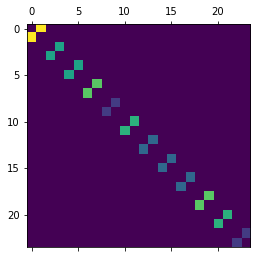

In [ ]:
Hk = F_Graphene(3, 4).conj().T@H_Graphene(3, 4)@F_Graphene(3, 4)
plt.matshow(np.abs(Hk))
print(np.linalg.eigh(Hk)[0])

In [ ]:
N1 = 27
N2 = 27
Hk = F_Graphene(N1, N2).conj().T@H_Graphene(N1, N2)@F_Graphene(N1, N2)

In [ ]:
mom_labels = momentumLabels_Graphene(N1, N2)

In [ ]:
es = []
kx, ky = [], []
E1 = []
E2 = []
ks = []
for i in range(0,len(Hk),2):
  block = Hk[i:i+2,i:i+2]
  energies = np.linalg.eigh(block)[0]
  E1.append(energies[0])
  E2.append(energies[1])
  ks.append(i)
  kx.append(momentumLabelToK_Graphene(mom_labels[i], N1, N2)[0])
  ky.append(momentumLabelToK_Graphene(mom_labels[i], N1, N2)[1])

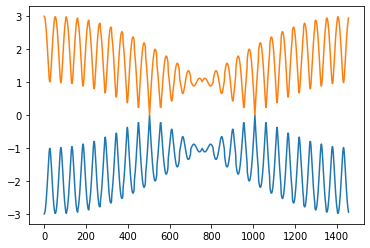

In [ ]:
plt.plot(ks, E1)
plt.plot(ks, E2)

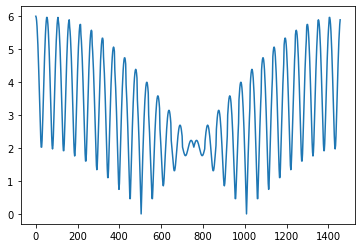

In [ ]:
plt.plot(ks, abs(np.array(E1) - np.array(E2)))

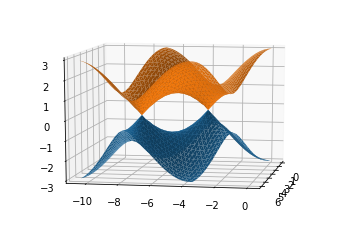

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(kx,ky,E1)
ax.plot_trisurf(kx,ky,E2)
ax.view_init(elev=10, azim=10)

## Boron Nitride

In [ ]:
#same as graphene, a sites = sme value M, b sites = -M

In [ ]:
def H_Boron(N1, N2, M):
  labels = Labels_Graphene(N1, N2)
  N = len(labels)
  H = np.zeros((N, N))
  count = 0
  for i in range(N):
    row = LabelToIndexGraphene(labels[i], N1, N2)
    neighbors = neighbors_graphene(labels[i], N1, N2)
    for j in range(len(neighbors)):
      col = LabelToIndexGraphene(neighbors[j], N1, N2)
      H[row][col] = -1
    H[row][row] = M
    M *= -1
  return H

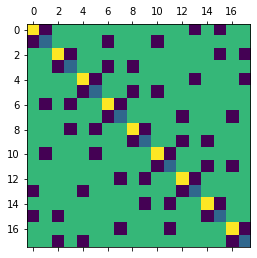

In [ ]:
plt.matshow(H_Boron(3, 3, 0.5))

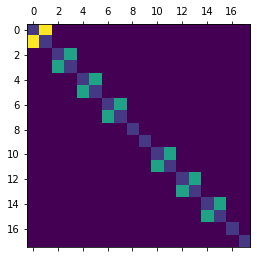

In [ ]:
Hk = F_Graphene(3, 3).conj().T@H_Boron(3, 3, 0.5)@F_Graphene(3, 3)
plt.matshow(np.abs(Hk))

In [ ]:
N1 = 27
N2 = 27
M = 0.5
f = F_Graphene(N1, N2)

In [ ]:
Hk = f.conj().T@H_Boron(N1, N2, M)@f
H = H_Boron(N1, N2, M)

In [ ]:
mom_labels = momentumLabels_Graphene(N1, N2)
es = []
kx, ky = [], []
E1 = []
E2 = []
ks = []
H = H_Boron(N1, N2, M)
for i in range(0,len(Hk),2):
  block = Hk[i:i+2,i:i+2]
  energies = np.linalg.eigh(block)[0]
  E1.append(energies[0])
  E2.append(energies[1])
  ks.append(i)
  kx.append(momentumLabelToK_Graphene(mom_labels[i], N1, N2)[0])
  ky.append(momentumLabelToK_Graphene(mom_labels[i], N1, N2)[1])

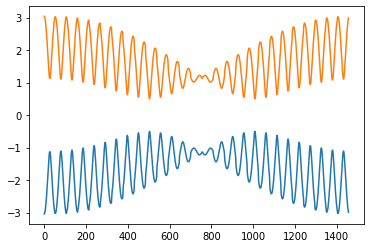

In [ ]:
plt.plot(ks, E1)
plt.plot(ks, E2)

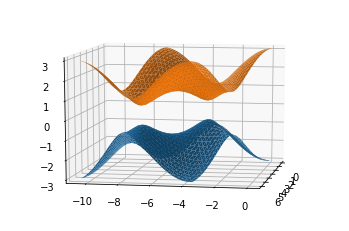

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(kx,ky,E1)
ax.plot_trisurf(kx,ky,E2)
ax.view_init(elev=10, azim=10)

In [ ]:
def get_min_bn(f, M, N1, N2, Hk):
  ft = f.conj().T
  Hk = ft@H_Boron(N1, N2, M)@f
  mom_labels = momentumLabels_Graphene(N1, N2)
  E1 = []
  E2 = []
  for i in range(0,len(Hk),2):
    block = Hk[i:i+2,i:i+2]
    energies = np.linalg.eigh(block)[0]
    E1.append(energies[0])
    E2.append(energies[1])

  diff = abs(np.array(E2)-np.array(E1))
  return min(diff)

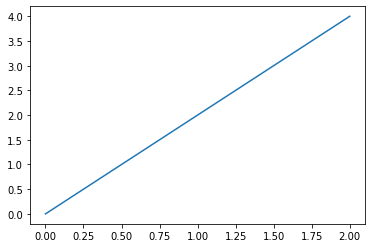

In [ ]:
N1 = 9
N2 = 9
f = F_Graphene(N1, N2)
ms = np.linspace(0,2,50)
min_e = []
for m in ms:
  min_e.append(get_min_bn(f, m, N1, N2, Hk))
plt.plot(ms, min_e)

## Haldane Model

In [ ]:
def get_second_neighbors(label, N1, N2):
  neighbors = []
  x, y = label[0]
  ns = get_pos(label, N1, N2)
  neighbors += ns
  return neighbors

In [ ]:
def get_pos(label, N1, N2):
  ns = []
  x, y = label[0]
  dir = ['pos', 'neg']
  #finding neighbors of pos a and neg b sites
  if(label[1] == 'a'): idx = 0
  else: idx = 1
  #up one
  if(y+1 < N2):
    ns.append((dir[idx], (x, y+1), label[1]))
  else:
    ns.append((dir[idx], (x, 0), label[1]))
  #right, down
  if(y-1 >= 0):
    if(x+1 < N1):
      ns.append((dir[idx], (x+1, y-1), label[1]))
    else:
      ns.append((dir[idx], (0, y-1), label[1]))
  else:
    if(x+1 < N1):
      ns.append((dir[idx], (x+1, N2-1), label[1]))
    else:
      ns.append((dir[idx], (0, N2-1), label[1]))
  #left
  if(x-1 >= 0):
    ns.append((dir[idx], (x-1, y), label[1]))
  else:
    ns.append((dir[idx], (N1-1, y), label[1]))
  #finding neighbors of neg a and pos b sites
  if(label[1] == 'a'): idx = 1
  else: idx = 0
  #right
  if(x+1 < N1):
    ns.append((dir[idx], (x+1, y), label[1]))
  else:
    ns.append((dir[idx], (0, y), label[1]))
  #down
  if(y-1 >= 0):
    ns.append((dir[idx], (x, y-1), label[1]))
  else:
    ns.append((dir[idx], (x, N2-1), label[1]))
  #left, up
  if(y+1 < N2):
    if(x-1 >= 0):
      ns.append((dir[idx], (x-1, y+1), label[1]))
    else:
      ns.append((dir[idx], (N1-1, y+1), label[1]))
  else:
    if(x-1 >= 0):
      ns.append((dir[idx], (x-1, 0), label[1]))
    else:
      ns.append((dir[idx], (N1-1, 0), label[1]))

  return ns

In [ ]:
def get_nonwrap(label, N1, N2):
  ns = []
  x, y = label[0]
  dir = ['pos', 'neg']
  #finding neighbors of pos a and neg b sites
  if(label[1] == 'a'): idx = 0
  else: idx = 1
  #up one
  if(y+1 < N2):
    ns.append((dir[idx], (x, y+1), label[1]))
  #right, down
  if(y-1 >= 0):
    if(x+1 < N1):
      ns.append((dir[idx], (x+1, y-1), label[1]))
  #left
  if(x-1 >= 0):
    ns.append((dir[idx], (x-1, y), label[1]))
  return ns

In [ ]:
N1 = 3
N2 = 4
myLabels = Labels_Graphene(N1, N2)
points = []
for label in myLabels:
  r = LabelToRGraphene(label)
  #plt.plot(r[0], r[1], marker='o', color='b')
  ns = get_second_neighbors(label, N1, N2)
  '''
  for n in ns:
    nn = n[1:]
    r2 = LabelToRGraphene(nn)
    if(n[0] == 'pos'):
      plt.plot([r[0], r2[0]], [r[1], r2[1]], linestyle='--', color='g')
    else:
      plt.plot([r[0], r2[0]], [r[1], r2[1]], linestyle='--', color='b')

  ns = get_nonwrap(label, N1, N2)
  for n in ns:
    r2 = LabelToRGraphene(n)
    plt.plot([r[0], r2[0]], [r[1], r2[1]], linestyle='-', color='r')
  '''

In [ ]:
def H_Haldane(N1, N2, M, t, phi):
  labels = Labels_Graphene(N1, N2)
  N = len(labels)
  H = np.zeros((N, N), dtype='complex')
  for i in range(N):
    row = LabelToIndexGraphene(labels[i], N1, N2)
    #first nearest neighbors
    neighbors = neighbors_graphene(labels[i], N1, N2)
    for j in range(len(neighbors)):
      col = LabelToIndexGraphene(neighbors[j], N1, N2)
      H[row][col] = -1
      '''
      if(labels[i][0] == neighbors[j][0]):
        if(labels[i][1] == 'a'):
          H[row][col] = M
        else:
          H[row][col] = -M
      else:
        H[row][col] = -1
      '''
    H[row][row] = M
    M *= -1
    #second nearest neighbors
    neighbors = get_second_neighbors(labels[i], N1, N2)
    for j in range(len(neighbors)):
      col = LabelToIndexGraphene(neighbors[j][1:], N1, N2)
      if(neighbors[j][0] == 'pos'):
        H[row][col] = -t*np.exp(-1j*phi)
      else:
        H[row][col] = -t*np.exp(1j*phi)
  return H

(-0.22945265618534655+0.1932653061713073j) (-0.22945265618534655-0.1932653061713073j)


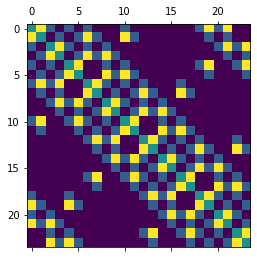

In [ ]:
t = 0.3
M = 0.5
phi = 0.7
N1 = 3
N2 = 4
print(-t*np.exp(-1j*phi), -t*np.exp(1j*phi))
plt.matshow(np.abs(H_Haldane(N1, N2, M, t, phi)))

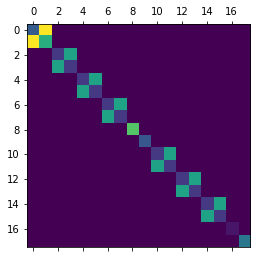

In [ ]:
N1 = 3
N2 = 3
f = F_Graphene(N1, N2)
Hk = f.conj().T@H_Haldane(N1, N2, M, t, phi)@f
plt.matshow(np.abs(Hk))

In [ ]:
N1 = 27
N2 = 27

f = F_Graphene(N1, N2)

In [ ]:
M = 0.8

In [ ]:
mom_labels = momentumLabels_Graphene(N1, N2)
Hk = f.conj().T@H_Haldane(N1, N2, M, t, phi)@f
es = []
kx, ky = [], []
E1 = []
E2 = []
ks = []
for i in range(0,len(Hk),2):
  block = Hk[i:i+2,i:i+2]
  energies = np.linalg.eigh(block)[0]
  E1.append(energies[0])
  E2.append(energies[1])
  ks.append(i)
  kx.append(momentumLabelToK_Graphene(mom_labels[i], N1, N2)[0])
  ky.append(momentumLabelToK_Graphene(mom_labels[i], N1, N2)[1])
  '''
  k = 22
  ns = get_neighbors(k, N1, N2)
  if(i in ns):
    plt.plot(kx[-1], ky[-1], 'o', color='b')
  else:
    plt.plot(kx[-1], ky[-1], 'o', color='g')
  '''

In [ ]:
print(len(mom_labels))

1458


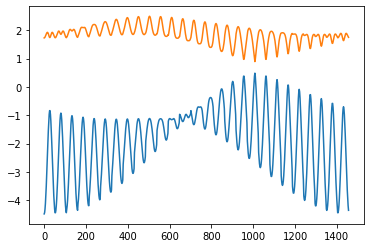

In [ ]:
plt.plot(ks, E1)
plt.plot(ks, E2)

In [ ]:
diff = abs(np.array(E1) - np.array(E2))
print(sorted(diff))
smallest = []
for i in range(30):
  smallest.append(list(diff).index(sorted(diff)[i]))
print(smallest)

[0.4084719777743549, 0.5952374100585165, 0.5952374100585165, 0.5952374100585165, 0.5952374100585165, 0.5952374100585167, 0.5952374100585169, 0.8017515973166274, 0.8017515973166275, 0.8017515973166278, 0.9060162079265841, 0.9060162079265841, 0.9060162079265847, 0.9600627339428218, 0.960062733942822, 0.9600627339428222, 0.9600627339428222, 0.9600627339428222, 0.9600627339428223, 1.1123757665928142, 1.1123757665928142, 1.1123757665928142, 1.1123757665928142, 1.1123757665928142, 1.1123757665928142, 1.324428821815319, 1.324428821815319, 1.3244288218153195, 1.3244288218153197, 1.3244288218153197, 1.3244288218153197, 1.3425638973357772, 1.3425638973357774, 1.3425638973357776, 1.3713895770569695, 1.3713895770569697, 1.3713895770569697, 1.3713895770569697, 1.37138957705697, 1.3713895770569702, 1.471458699932839, 1.4714586999328392, 1.4714586999328392, 1.4714586999328394, 1.4714586999328396, 1.4714586999328396, 1.6310528960392163, 1.6310528960392165, 1.6310528960392165, 1.631052896039217, 1.6310

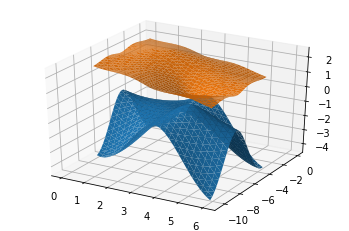

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(kx,ky,E1)
ax.plot_trisurf(kx,ky,E2)
#ax.view_init(elev=10, azim=5)

# **Topological Insulators**

## Measuring Gap

In [ ]:
def get_min(f, M, N1, N2, Hk, t, phi):
  ft = f.conj().T
  Hk = ft@H_Haldane(N1, N2, M, t, phi)@f
  mom_labels = momentumLabels_Graphene(N1, N2)
  E1 = []
  E2 = []
  for i in range(0,len(Hk),2):
    block = Hk[i:i+2,i:i+2]
    energies = np.linalg.eigh(block)[0]
    E1.append(energies[0])
    E2.append(energies[1])

  diff = abs(np.array(E2)-np.array(E1))
  return min(diff)

Text(0, 0.5, 'Minimum Gap')

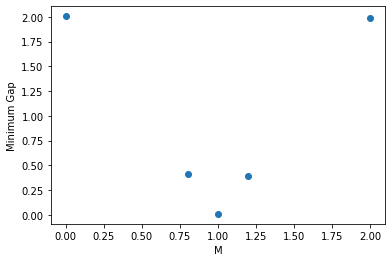

In [ ]:
#ms = np.linspace(0,2,20)
ms = [0.0, 0.8, 1.0, 1.2, 2.0]
#ms = np.arange(0, 2, 0.1)
min_e = []
for m in ms:
  min_e.append(get_min(f, m, N1, N2, Hk, t, phi))
plt.scatter(ms, min_e)
plt.xlabel('M')
plt.ylabel('Minimum Gap')

In [ ]:
print(get_min(f, 1.0, N1, N2, Hk, t, phi))
print(ms)

0.008471977774354711
[0.0, 0.8, 1.0, 1.2, 2.0]


## Berry Phase

In [ ]:
'''
for i in range(0, len(Hk), 2):
  x,y = momentumLabelToK_Graphene(mom_labels[i], N1, N2)
  plt.plot(x, y, 'o')
  k2, k3, k4 = flux(i, Hk, N1, N2)
  x2, y2 = momentumLabelToK_Graphene(mom_labels[k2], N1, N2)
  x3, y3 = momentumLabelToK_Graphene(mom_labels[k3], N1, N2)
  x4, y4 = momentumLabelToK_Graphene(mom_labels[k4], N1, N2)
  if(i == 16):
    plt.plot([x, x2], [y, y2], linestyle='--')
    plt.plot([x2, x4], [y2, y4], linestyle='--')
    plt.plot([x4, x3], [y4, y3], linestyle='--')
    plt.plot([x3, x], [y3, y], linestyle='--')
'''

"\nfor i in range(0, len(Hk), 2):\n  x,y = momentumLabelToK_Graphene(mom_labels[i], N1, N2)\n  plt.plot(x, y, 'o')\n  k2, k3, k4 = flux(i, Hk, N1, N2)\n  x2, y2 = momentumLabelToK_Graphene(mom_labels[k2], N1, N2)\n  x3, y3 = momentumLabelToK_Graphene(mom_labels[k3], N1, N2)\n  x4, y4 = momentumLabelToK_Graphene(mom_labels[k4], N1, N2)\n  if(i == 16):\n    plt.plot([x, x2], [y, y2], linestyle='--')\n    plt.plot([x2, x4], [y2, y4], linestyle='--')\n    plt.plot([x4, x3], [y4, y3], linestyle='--')\n    plt.plot([x3, x], [y3, y], linestyle='--')\n"

In [ ]:
import cmath
def berry(i, j, Hk, N1, N2):
  mom_labels = momentumLabels_Graphene(N1, N2)
  block1 = Hk[i:i+2,i:i+2]
  v1 = np.linalg.eigh(block1)[1][:,0]
  block2 = Hk[j:j+2,j:j+2]
  v2 = np.linalg.eigh(block2)[1][:,0]
  B = v1@v2.conj()
  r, theta = cmath.polar(B)
  return theta

In [ ]:
def get_neighbors(k, N1, N2):
  mom_labels = momentumLabels_Graphene(N1, N2)
  ns = []
  #right neighbor
  if((k+2)%N1 == 0):
    ns.append(k - 2*(N1-1))
  else:
    ns.append(k+2)
  #down neighbor
  if((k+2*N1) < len(mom_labels)):
    ns.append(k+2*N1)
  else:
    ns.append(k-(2*N1*(N2-1)))
  #down right neighbor
  if((k+2)%N1 != 0):
    if((k+2*N1) < len(mom_labels)):
      ns.append(k + 2 + 2*N1)
    else:
      ns.append(k-(2*N1*(N2-1))+2)
  else:
    if((k+2*N1) < len(mom_labels)):
      ns.append(k+2)
    else:
      ns.append(0)
  return ns

In [ ]:
def adjust(f):
  while(f <= -np.pi):
    f += 2*np.pi
  while(f >= np.pi):
    f -= 2*np.pi
  return f

In [ ]:
def flux(k1, Hk, N1, N2):
  mom_labels = momentumLabels_Graphene(N1, N2)
  #k2 is right neighbor, k3 is down, k4 is down right
  k2, k3, k4 = get_neighbors(k1, N1, N2)
  #return k2, k3, k4
  flux = berry(k1, k2, Hk, N1, N2)
  flux += berry(k2, k4, Hk, N1, N2)
  flux += berry(k4, k3, Hk, N1, N2)
  flux += berry(k3, k1, Hk, N1, N2)
  flux = adjust(flux)
  return flux


In [ ]:
N1 = 9
N2 = 9
M = 0.8
t = 0.3
phi = 0.7
f = F_Graphene(N1, N2)
mom_labels = momentumLabels_Graphene(N1, N2)

In [ ]:
Hk = f.conj().T@H_Haldane(N1, N2, M, t, phi)@f
fluxes = []
kx = []
ky = []
ks = []
for i in range(0, len(Hk), 2):
  fluxes.append(flux(i, Hk, N1, N2))
  ks.append(i)
  x,y = momentumLabelToK_Graphene(mom_labels[i], N1, N2)
  kx.append(x)
  ky.append(y)

kx = np.array(kx).reshape((N1, N2))
ky = np.array(ky).reshape((N1, N2))
fs = (np.array((fluxes))).reshape((N1, N2))

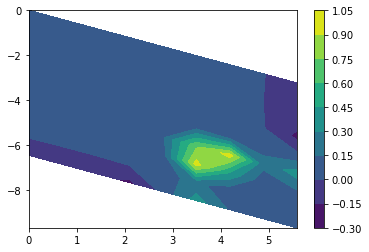

In [ ]:
plt.contourf(kx, ky, fs)
plt.colorbar()

In [ ]:
biggest = []
for i in range(1,30):
  biggest.append(list(fluxes).index(sorted(fluxes)[len(fluxes)-i]))
print(sorted(biggest))
print(sorted(smallest))

## Chern Number

In [ ]:
def get_flux(M, f, N1, N2, t, phi):
  ft = f.conj().T
  Hk = ft@H_Haldane(N1, N2, M, t, phi)@f
  fluxes = []
  for i in range(0, len(Hk), 2):
    fluxes.append(flux(i, Hk, N1, N2))
  return fluxes

In [ ]:
N1 = 9
N2 = 9
t = 0.3
phi = 0.7
f = F_Graphene(N1, N2)

In [ ]:
ms = np.arange(0, 2, 0.1)
cherns = []
for m in ms:
  fs = get_flux(m, f, N1, N2, t, phi)
  total = np.sum(fs)
  cherns.append(round(total/(2*np.pi)))

Text(0, 0.5, 'Chern Number')

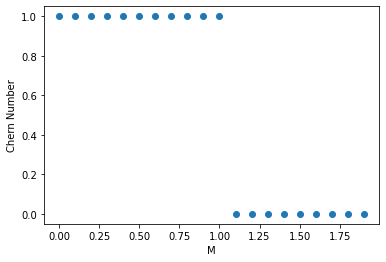

In [ ]:
plt.scatter(ms, cherns)
plt.xlabel('M')
plt.ylabel('Chern Number')

## Edge Modes

In [ ]:
def nearest_neighbors_edge(label, N1, N2):
  neighbors = []
  x, y = label[0]
  atom = label[1]
  if(atom == 'a'):
    neighbors.append(((label[0], 'b')))
    if(y-1 >= 0):
      neighbors.append(((x, y-1), 'b'))
      if(x+1 < N1):
        neighbors.append(((x+1, y-1), 'b'))
    else:
      neighbors.append(((x, N2-1), 'b'))
      if(x+1 < N1):
        neighbors.append(((x+1, N2-1), 'b'))
  else:
    neighbors.append((label[0], 'a'))
    if(y+1 < N2):
        neighbors.append(((x, y+1), 'a'))
        if(x-1 >= 0):
          neighbors.append(((x-1, y+1), 'a'))
    else:
      neighbors.append(((x, 0), 'a'))
      if(x-1 >= 0):
        neighbors.append(((x-1, 0), 'a'))
  return neighbors

In [ ]:
def second_neighbors_edge(label, N1, N2):
  neighbors = []
  x, y = label[0]
  ns = get_pos_edge(label, N1, N2)
  neighbors += ns
  return neighbors

In [ ]:
def get_pos_edge(label, N1, N2):
  ns = []
  x, y = label[0]
  dir = ['pos', 'neg']
  #finding neighbors of pos a and neg b sites
  if(label[1] == 'a'): idx = 0
  else: idx = 1
  #up one
  if(y+1 < N2):
    ns.append((dir[idx], (x, y+1), label[1]))
  else:
    ns.append((dir[idx], (x, 0), label[1]))
  #right, down
  if(y-1 >= 0):
    if(x+1 < N1):
      ns.append((dir[idx], (x+1, y-1), label[1]))
  else:
    if(x+1 < N1):
      ns.append((dir[idx], (x+1, N2-1), label[1]))
  #left
  if(x-1 >= 0):
    ns.append((dir[idx], (x-1, y), label[1]))

  #finding neighbors of neg a and pos b sites
  if(label[1] == 'a'): idx = 1
  else: idx = 0
  #right
  if(x+1 < N1):
    ns.append((dir[idx], (x+1, y), label[1]))
  #down
  if(y-1 >= 0):
    ns.append((dir[idx], (x, y-1), label[1]))
  else:
    ns.append((dir[idx], (x, N2-1), label[1]))
  #left, up
  if(y+1 < N2):
    if(x-1 >= 0):
      ns.append((dir[idx], (x-1, y+1), label[1]))
  else:
    if(x-1 >= 0):
      ns.append((dir[idx], (x-1, 0), label[1]))
  return ns

In [ ]:
def H_Haldane_edge(N1, N2, M, t, phi):
  labels = Labels_Graphene(N1, N2)
  N = len(labels)
  H = np.zeros((N, N), dtype='complex')
  for i in range(N):
    row = LabelToIndexGraphene(labels[i], N1, N2)
    #first nearest neighbors
    neighbors = nearest_neighbors_edge(labels[i], N1, N2)
    for j in range(len(neighbors)):
      col = LabelToIndexGraphene(neighbors[j], N1, N2)
      H[row][col] = -1
    H[row][row] = M
    M *= -1
    #second nearest neighbors
    neighbors = second_neighbors_edge(labels[i], N1, N2)
    for j in range(len(neighbors)):
      col = LabelToIndexGraphene(neighbors[j][1:], N1, N2)
      if(neighbors[j][0] == 'pos'):
        H[row][col] = -t*np.exp(-1j*phi)
      else:
        H[row][col] = -t*np.exp(1j*phi)
  return H

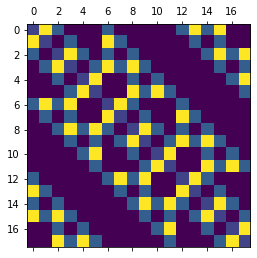

In [ ]:
N1 = 3
N2 = 3
M = 0.2
t = 0.3
phi = 0.7
plt.matshow(np.abs(H_Haldane_edge(N1, N2, M, t, phi)))

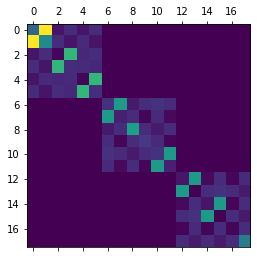

In [ ]:
f = F_Graphene(3, 3)
Hk_edge = f.conj().T@H_Haldane_edge(3, 3, 0.2, t, phi)@f
plt.matshow(np.abs(Hk_edge))

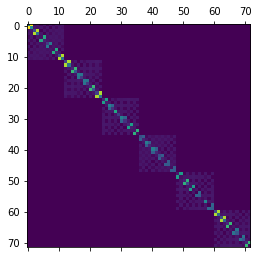

In [ ]:
f = F_Graphene(6, 6)
Hk_edge = f.conj().T@H_Haldane_edge(6, 6, 0.2, t, phi)@f
plt.matshow(np.abs(Hk_edge))

In [ ]:
N1 = 9
N2 = 9
M = 0.2

f = F_Graphene(N1, N2)
Hk_edge = f.conj().T@H_Haldane_edge(N1, N2, M, t, phi)@f
mom_labels = momentumLabels_Graphene(N1, N2)

ky = []
tot_e = np.zeros((2*N1, int(len(Hk_edge)/(2*N1))))
count = 0
for i in range(0,len(Hk_edge),2*N1):
  block = Hk_edge[i:i+2*N1,i:i+2*N1]
  energies = np.linalg.eigh(block)[0]
  for j in range(len(energies)):
    tot_e[j][count] = energies[j]
  count += 1
  ky.append(momentumLabelToK_Graphene(mom_labels[i], N1, N2)[1])

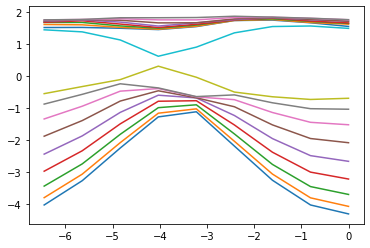

In [ ]:
for i in range(len(tot_e)):
  plt.plot(ky, tot_e[i])